In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import normalize
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.models import Model

from data_generation import *

In [2]:
class Autoencoder(Model):
  def __init__(self, original_dim, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(np.product(original_dim), activation='sigmoid'),
      layers.Reshape(original_dim)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

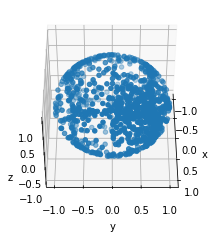

In [34]:
def plot3d(X):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1,2,2,projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(X[:,0],X[:,1],X[:,2])
    ax.view_init(45,0)

In [35]:
np.random.seed(100)
n_features=3
n_samples=1000
epochs=10
X = unif_cylinder(n_samples=n_samples, radius=1, height=100, n_features=n_features)
X = normalize(X.reshape(n_samples,n_features))

autoencoder = Autoencoder((3,), 2)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(X, X,
                epochs=epochs,
                shuffle=True)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.3522
Epoch 2/10
1000/1000 [==============================] - 0s 35us/sample - loss: 0.3426
Epoch 3/10
1000/1000 [==============================] - 0s 38us/sample - loss: 0.3334
Epoch 4/10
1000/1000 [==============================] - 0s 50us/sample - loss: 0.3246
Epoch 5/10
1000/1000 [==============================] - 0s 36us/sample - loss: 0.3158
Epoch 6/10
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3074
Epoch 7/10
1000/1000 [==============================] - 0s 31us/sample - loss: 0.2993
Epoch 8/10
1000/1000 [==============================] - 0s 36us/sample - loss: 0.2915
Epoch 9/10
1000/1000 [==============================] - 0s 34us/sample - loss: 0.2841
Epoch 10/10
1000/1000 [==============================] - 0s 35us/sample - loss: 0.2769



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

(1000, 2)


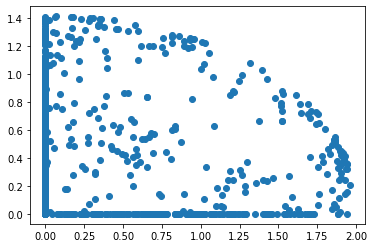

In [36]:
X_new = autoencoder.encoder(X).numpy()
print(X_new.shape)
plt.scatter(X_new[:,0],X_new[:,1])